## For test.csv and test_label.csv

In [1]:
import pandas as pd

test_data = pd.read_csv('files/test.csv')
label_data = pd.read_csv('files/test_label.csv')
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.0,0.000340,0.000432,0.000000,0.0,0.694290,0.038316,0.0,0.000000,0.0,...,0.0,0.50,0.036442,0.000000,0.0,0.023256,0.055147,0.055147,0.0,0.0
1,0.0,0.000510,0.000576,0.000000,0.0,0.694702,0.038856,0.0,0.427536,0.0,...,0.0,0.25,0.025862,0.000000,0.0,0.028623,0.040441,0.040441,0.0,0.0
2,0.0,0.000510,0.000576,0.000000,0.0,0.694908,0.038856,0.0,0.000000,0.0,...,0.0,0.25,0.307994,0.013699,0.0,0.026834,0.183824,0.180147,0.0,0.0
3,0.0,0.000170,0.000432,0.000000,0.0,0.695114,0.038856,0.0,0.007246,0.0,...,0.0,0.25,0.026254,0.000000,0.0,0.030411,0.047794,0.047794,0.0,0.0
4,0.0,0.000935,0.000720,0.000336,0.0,0.695733,0.039935,0.0,0.000000,0.0,...,0.0,0.25,0.014107,0.000000,0.0,0.028623,0.033088,0.029412,0.0,0.0


In [2]:
label_data.head()

,0
0,0
1,0
2,0
3,0
4,0


In [3]:
test_data["label"] = label_data

In [4]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,label
0,0.0,0.000340,0.000432,0.000000,0.0,0.694290,0.038316,0.0,0.000000,0.0,...,0.50,0.036442,0.000000,0.0,0.023256,0.055147,0.055147,0.0,0.0,0
1,0.0,0.000510,0.000576,0.000000,0.0,0.694702,0.038856,0.0,0.427536,0.0,...,0.25,0.025862,0.000000,0.0,0.028623,0.040441,0.040441,0.0,0.0,0
2,0.0,0.000510,0.000576,0.000000,0.0,0.694908,0.038856,0.0,0.000000,0.0,...,0.25,0.307994,0.013699,0.0,0.026834,0.183824,0.180147,0.0,0.0,0
3,0.0,0.000170,0.000432,0.000000,0.0,0.695114,0.038856,0.0,0.007246,0.0,...,0.25,0.026254,0.000000,0.0,0.030411,0.047794,0.047794,0.0,0.0,0
4,0.0,0.000935,0.000720,0.000336,0.0,0.695733,0.039935,0.0,0.000000,0.0,...,0.25,0.014107,0.000000,0.0,0.028623,0.033088,0.029412,0.0,0.0,0


In [5]:
corr_matrix = test_data.corr()
correlations_with_label = corr_matrix['label'].abs().sort_values(ascending=False)

In [6]:
correlations_with_label

label    1.000000
1        0.318340
2        0.316986
3        0.314739
15       0.230517
5        0.200132
11       0.195146
24       0.185073
29       0.179200
10       0.139513
30       0.134337
35       0.124420
6        0.123942
13       0.120260
23       0.114798
34       0.113310
25       0.112466
4        0.101824
9        0.100775
0        0.092786
22       0.091997
8        0.088918
27       0.068885
14       0.065617
16       0.058224
33       0.046892
12       0.042752
31       0.035414
17       0.027974
20       0.024251
21       0.023154
19       0.019180
18       0.018108
28       0.016265
32       0.008848
7             NaN
26            NaN
36            NaN
37            NaN
Name: label, dtype: float64

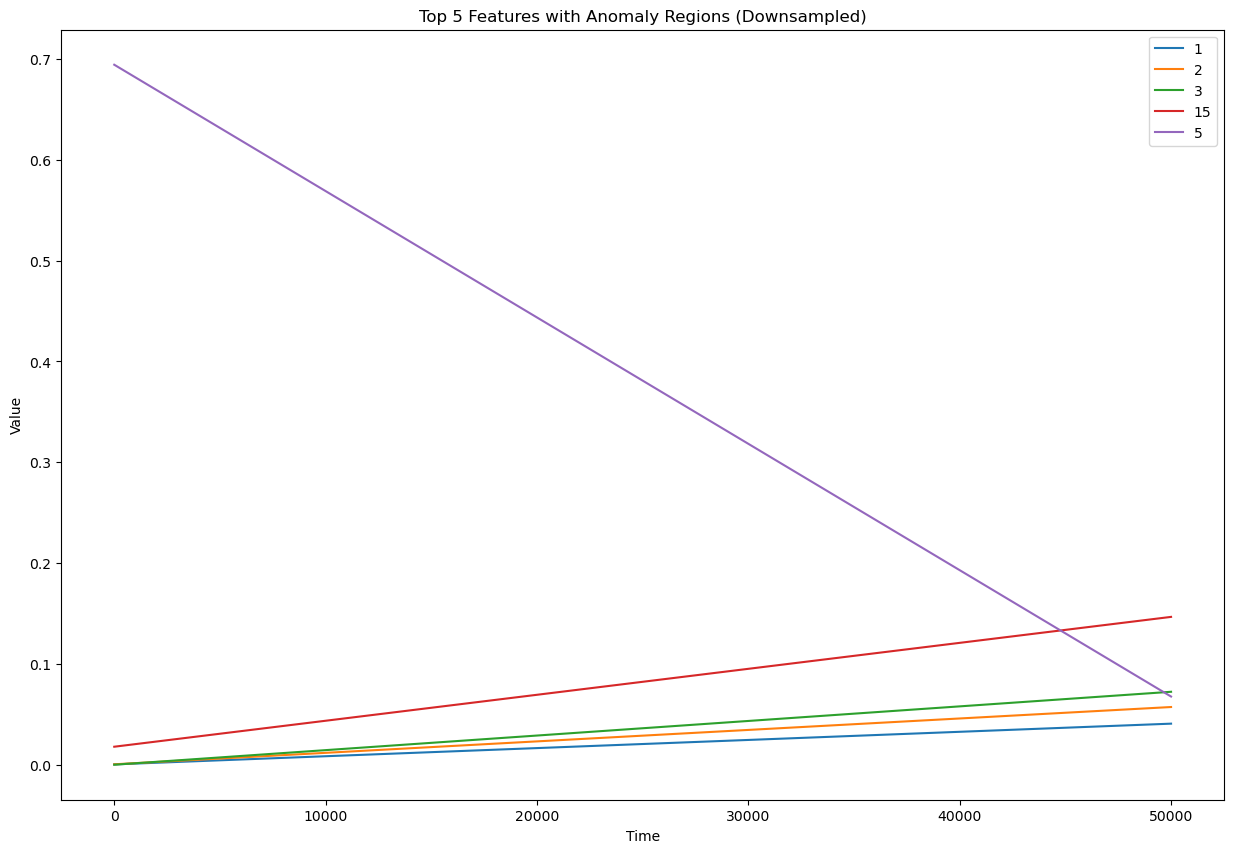

In [7]:
# I will first complete the task of finding the correlation matrix to reduce the features and ensure that the plot is clearly visible.
import matplotlib.pyplot as plt

# Downsample data
downsampled_test_data = test_data.iloc[::50000]
downsampled_label_data = label_data.iloc[::50000]

top_features = correlations_with_label.index[1:6]

# Plot time series data for the top 5 features
plt.figure(figsize=(15, 10))
for feature in top_features:
    plt.plot(downsampled_test_data.index, downsampled_test_data[feature], label=feature)

# Overlay anomaly regions
anomaly_indices = downsampled_label_data[downsampled_label_data.values == 1].index
for index in anomaly_indices:
    plt.axvline(x=index, color='r', linestyle='--', label='_Anomaly Regions')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Top 5 Features with Anomaly Regions (Downsampled)')
plt.legend(loc='upper right')
plt.show()

In [8]:
import numpy as np
import seaborn as sns

test_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,label
count,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.0,70001.000000,70001.000000,...,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.0,70001.0,70001.000000
mean,0.125281,0.025424,0.034415,0.037462,0.322057,0.459721,0.336344,0.0,0.011226,0.000749,...,0.169050,0.191246,0.104893,0.018708,0.051599,0.269691,0.229657,0.0,0.0,0.065713
std,0.148530,0.072388,0.088629,0.093520,0.456736,0.347015,0.312518,0.0,0.056158,0.015199,...,0.075581,0.170423,0.187695,0.054665,0.047420,0.213860,0.230937,0.0,0.0,0.247782
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.010309,0.001495,0.001873,0.002546,0.000000,0.068121,0.060259,0.0,0.000058,0.000000,...,0.125000,0.061520,0.000000,0.000000,0.013514,0.099265,0.042573,0.0,0.0,0.000000
50%,0.070707,0.004785,0.005242,0.006364,0.000000,0.534963,0.309052,0.0,0.001867,0.000000,...,0.149425,0.137931,0.001101,0.000000,0.028623,0.224793,0.137634,0.0,0.0,0.000000
75%,0.191919,0.020927,0.029270,0.031797,0.976471,0.685973,0.346061,0.0,0.006221,0.000000,...,0.218391,0.254096,0.114316,0.000000,0.089041,0.396694,0.391304,0.0,0.0,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.976471,1.000000,1.000000,0.0,1.000000,1.000000,...,0.875000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


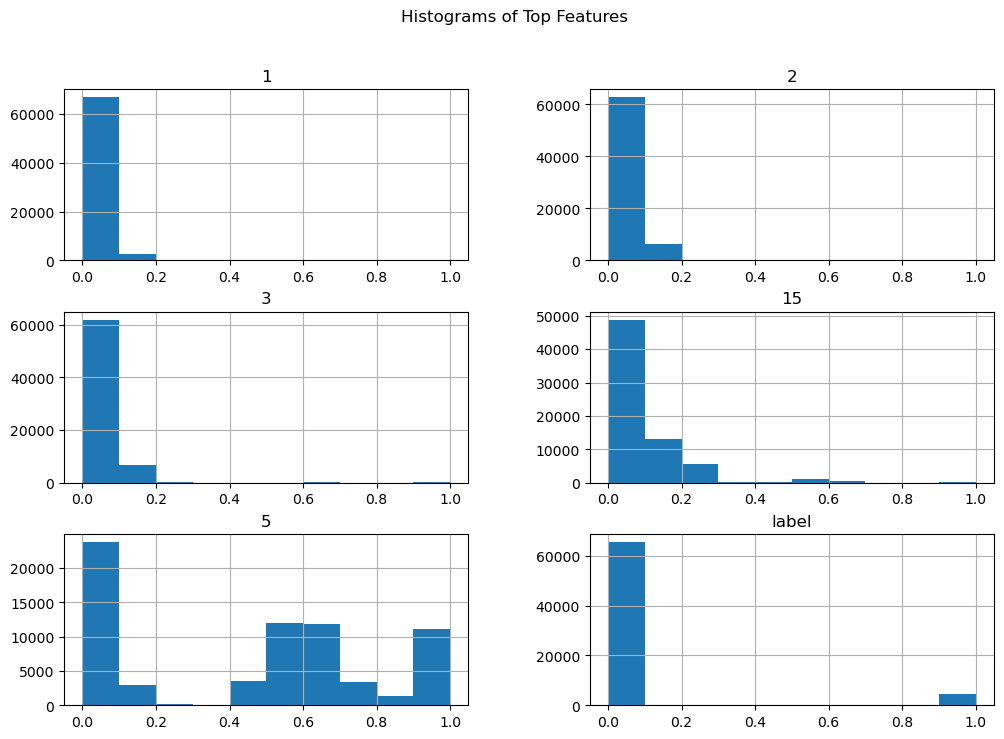

In [9]:
selected_features = top_features.tolist() + ['label']
selected_df = test_data[selected_features]
selected_df.hist(figsize=(12, 8))
plt.suptitle('Histograms of Top Features')
plt.show()

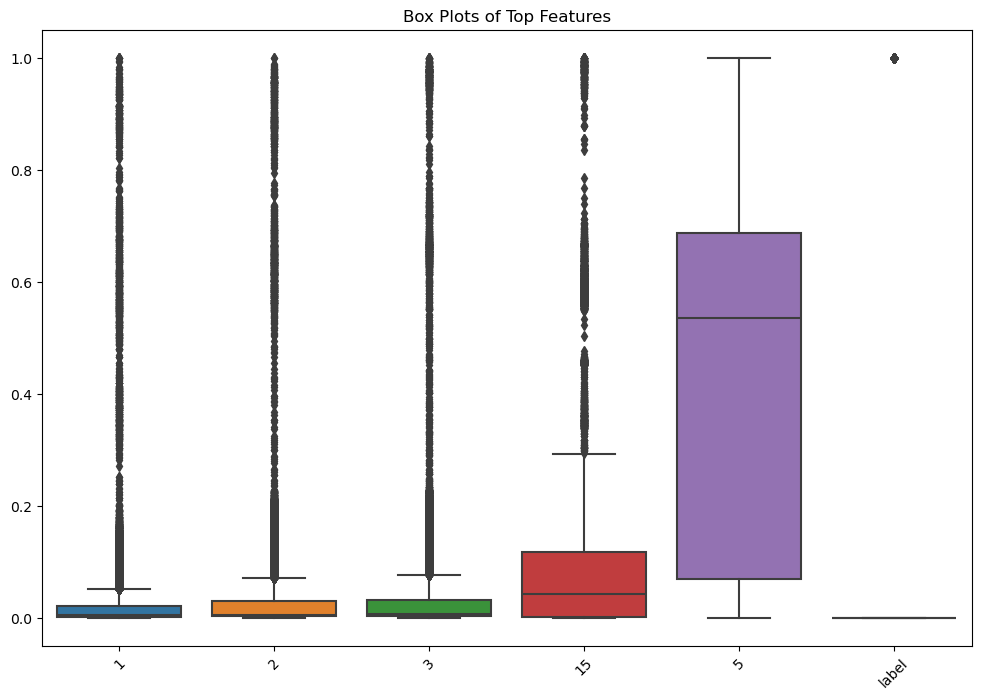

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=selected_df)
plt.title('Box Plots of Top Features')
plt.xticks(rotation=45)
plt.show()

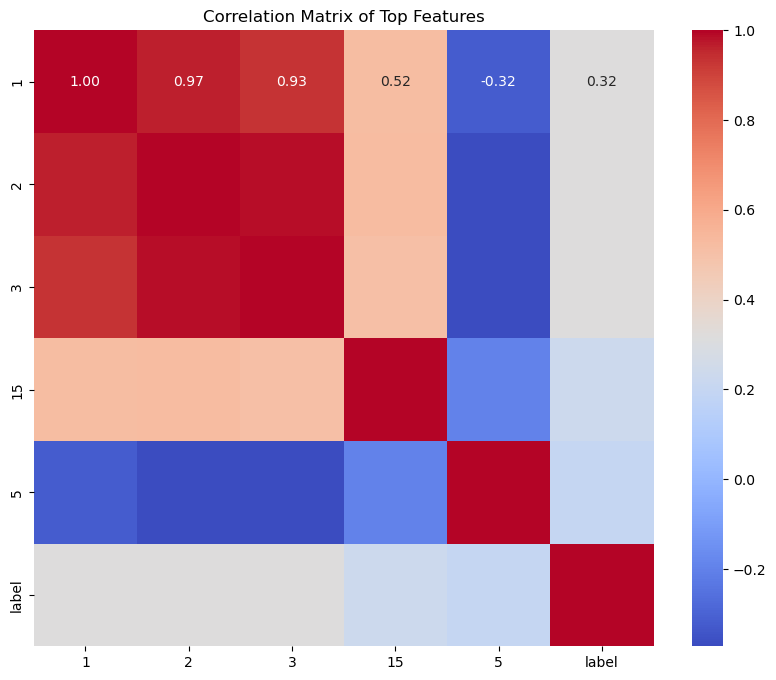

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(selected_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Top Features')
plt.show()

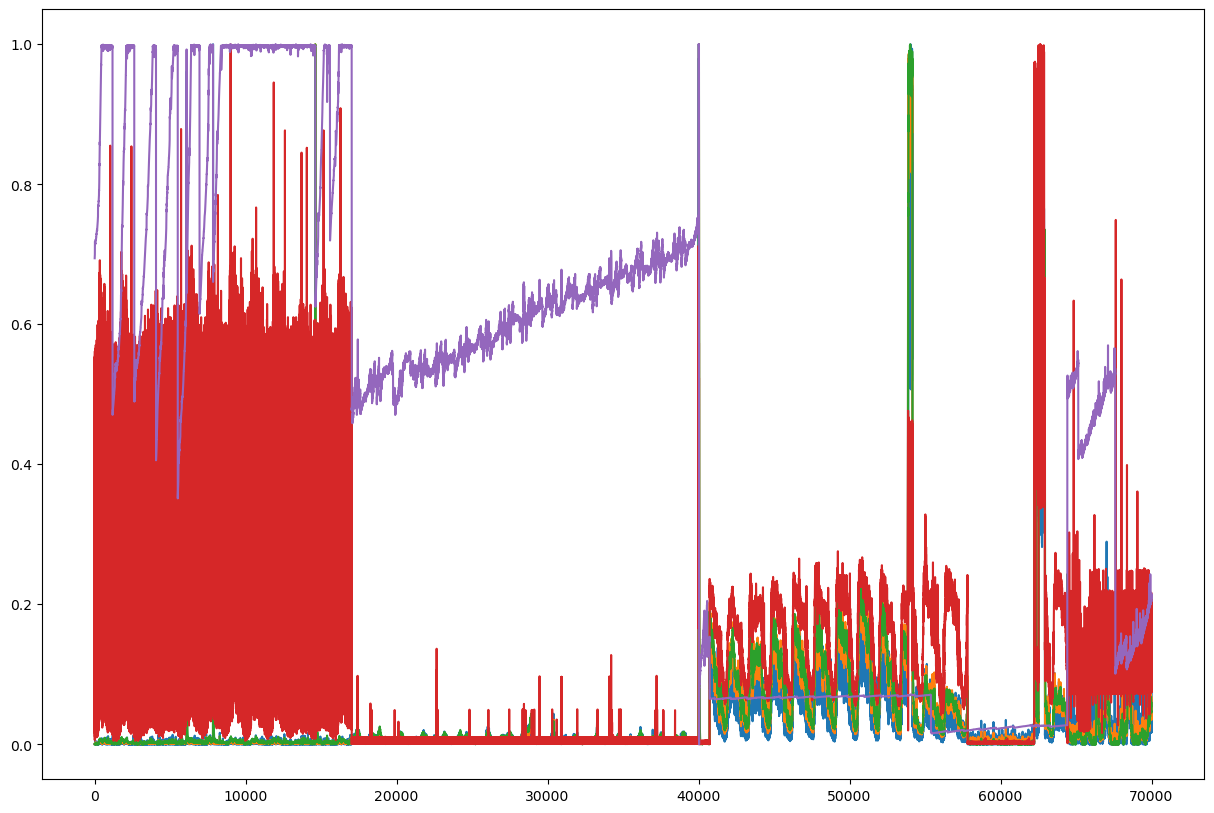

In [12]:
plt.figure(figsize=(15, 10))
for feature in top_features:
    plt.plot(test_data.index, test_data[feature], label=feature)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


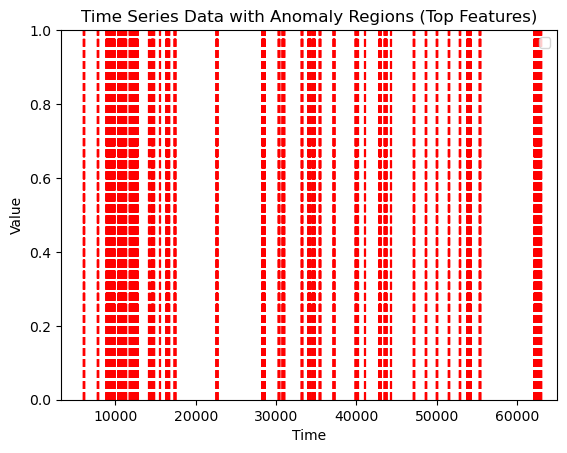

In [13]:
anomaly_indices = test_data[test_data['label'] == 1].index
for index in anomaly_indices:
    plt.axvline(x=index, color='r', linestyle='--', label='_Anomaly Regions')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Data with Anomaly Regions (Top Features)')
plt.legend(loc='upper right')
plt.show()

In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70001 entries, 0 to 70000
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       70001 non-null  float64
 1   1       70001 non-null  float64
 2   2       70001 non-null  float64
 3   3       70001 non-null  float64
 4   4       70001 non-null  float64
 5   5       70001 non-null  float64
 6   6       70001 non-null  float64
 7   7       70001 non-null  float64
 8   8       70001 non-null  float64
 9   9       70001 non-null  float64
 10  10      70001 non-null  float64
 11  11      70001 non-null  float64
 12  12      70001 non-null  float64
 13  13      70001 non-null  float64
 14  14      70001 non-null  float64
 15  15      70001 non-null  float64
 16  16      70001 non-null  float64
 17  17      70001 non-null  float64
 18  18      70001 non-null  float64
 19  19      70001 non-null  float64
 20  20      70001 non-null  float64
 21  21      70001 non-null  float64
 22

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = test_data.drop("label", axis="columns")
y = test_data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
X_train.shape

(56000, 38)

In [17]:
X_test.shape

(14001, 38)

In [18]:
model.predict(X_test[:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [19]:
y_test[:10]

46730    0
48393    0
41416    0
34506    0
43725    0
11615    0
24656    0
22411    0
936      0
56364    0
Name: label, dtype: int64

In [20]:
model.score(X_test, y_test)

0.9744303978287265

## For smap_test.csv and smap_test_labels.csv

In [21]:
smap_test = pd.read_csv('files/smap_test.csv')
smap_test_label = pd.read_csv('files/smap_test_label.csv')
smap_test.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [22]:
smap_test_label.head()

,0
0,0
1,0
2,0
3,0
4,0


In [23]:
smap_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,...,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000
mean,-0.179944,0.019174,0.003442,0.015392,0.000313,0.090146,0.068957,0.000664,0.000194,0.000309,...,0.000063,0.000063,0.014838,0.014504,0.007736,0.000103,0.020607,0.019125,0.000065,0.000065
std,0.775223,0.137135,0.058570,0.123107,0.017699,0.286391,0.253381,0.025762,0.013931,0.017567,...,0.007946,0.007946,0.120905,0.119555,0.087613,0.010143,0.142066,0.136963,0.008092,0.008092
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.997772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.358844,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666807,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
smap_test["label"] = smap_test_label

In [25]:
corr_matrix = smap_test.corr()
correlations_with_label = corr_matrix['label'].abs().sort_values(ascending=False)

In [26]:
correlations_with_label

label    1.000000
5        0.043705
0        0.042817
6        0.038871
24       0.021130
23       0.021130
15       0.020749
16       0.020749
1        0.017958
18       0.017470
3        0.017455
17       0.017292
21       0.017257
22       0.015952
19       0.011358
20       0.006469
11       0.005988
7        0.003894
2        0.003620
9        0.002744
12       0.001454
14       0.001356
13       0.001356
4        0.000847
10       0.000828
8        0.000310
Name: label, dtype: float64

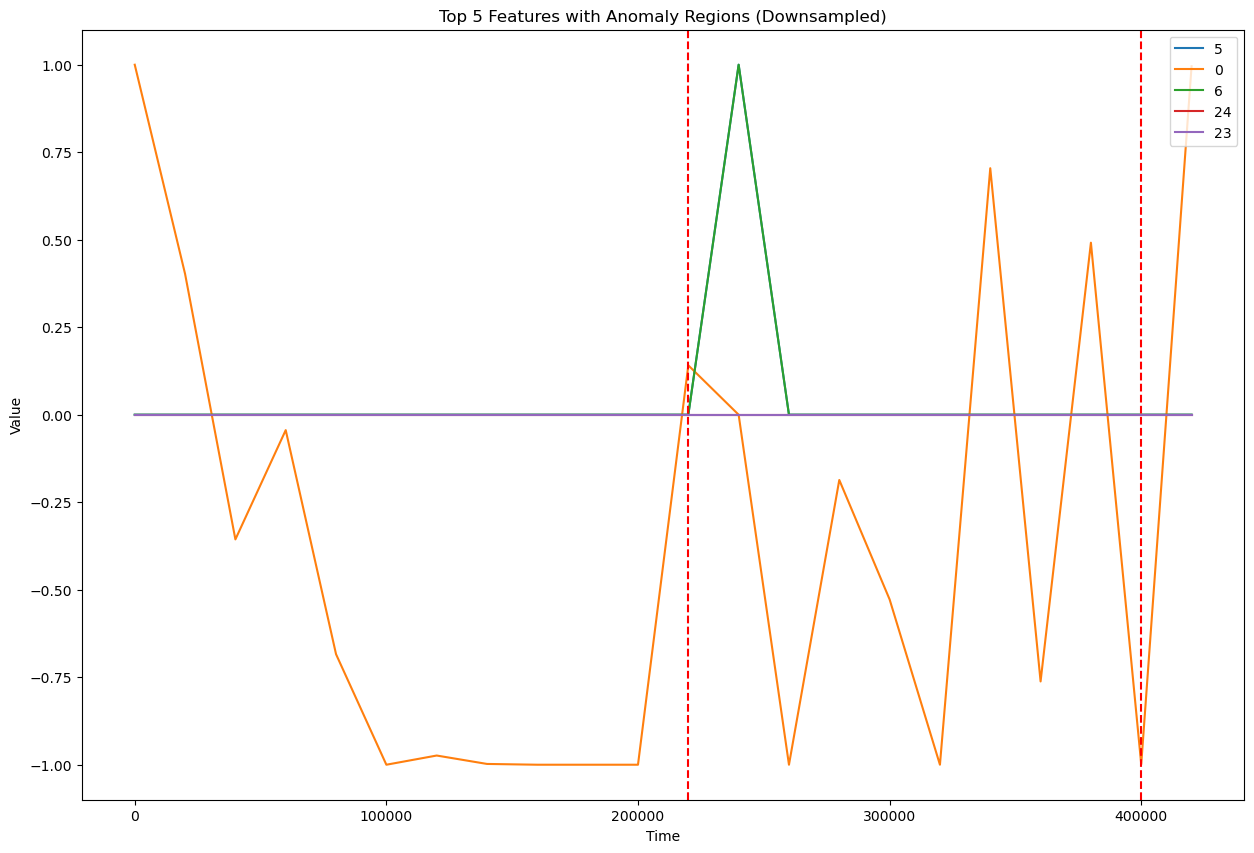

In [27]:
# I will first complete the task of finding the correlation matrix to reduce the features and ensure that the plot is clearly visible.
import matplotlib.pyplot as plt

# Downsample data
downsampled_test_data = smap_test.iloc[::20000]
downsampled_label_data = smap_test_label.iloc[::20000]

top_features = correlations_with_label.index[1:6]

# Plot time series data for the top 5 features
plt.figure(figsize=(15, 10))
for feature in top_features:
    plt.plot(downsampled_test_data.index, downsampled_test_data[feature], label=feature)

# Overlay anomaly regions
anomaly_indices = downsampled_label_data[downsampled_label_data.values == 1].index
for index in anomaly_indices:
    plt.axvline(x=index, color='r', linestyle='--', label='_Anomaly Regions')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Top 5 Features with Anomaly Regions (Downsampled)')
plt.legend(loc='upper right')
plt.show()

In [28]:
import numpy as np
import seaborn as sns

smap_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,label
count,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,...,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000,427617.000000
mean,-0.179944,0.019174,0.003442,0.015392,0.000313,0.090146,0.068957,0.000664,0.000194,0.000309,...,0.000063,0.014838,0.014504,0.007736,0.000103,0.020607,0.019125,0.000065,0.000065,0.127909
std,0.775223,0.137135,0.058570,0.123107,0.017699,0.286391,0.253381,0.025762,0.013931,0.017567,...,0.007946,0.120905,0.119555,0.087613,0.010143,0.142066,0.136963,0.008092,0.008092,0.333989
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.997772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.358844,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666807,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


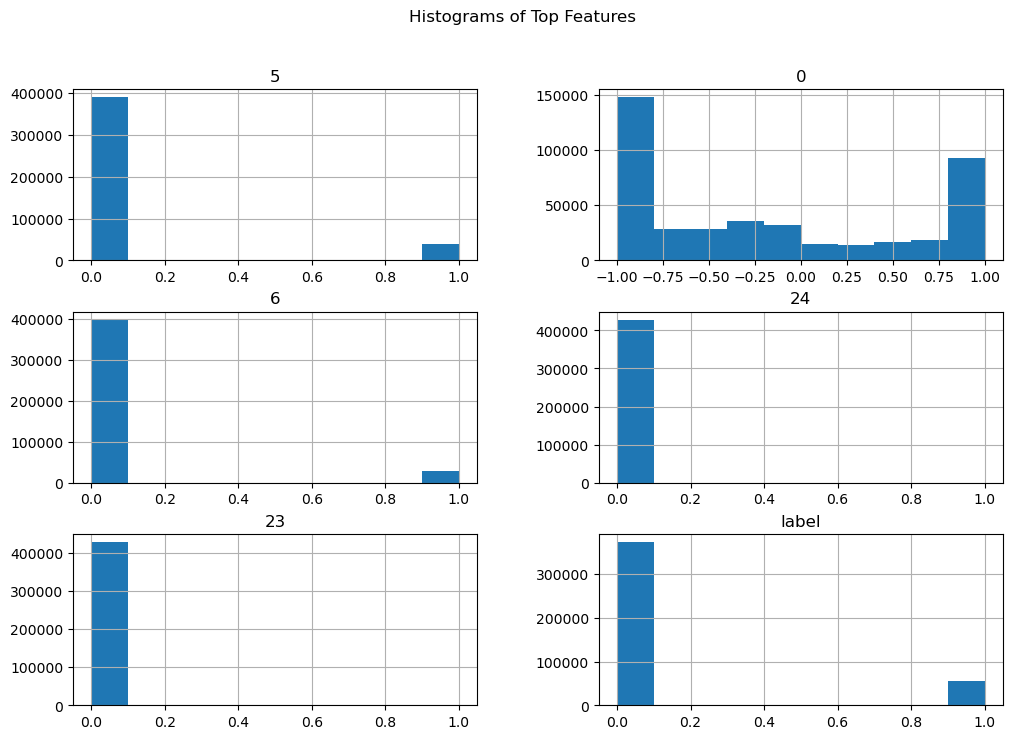

In [29]:
selected_features = top_features.tolist() + ['label']
selected_df = smap_test[selected_features]
selected_df.hist(figsize=(12, 8))
plt.suptitle('Histograms of Top Features')
plt.show()

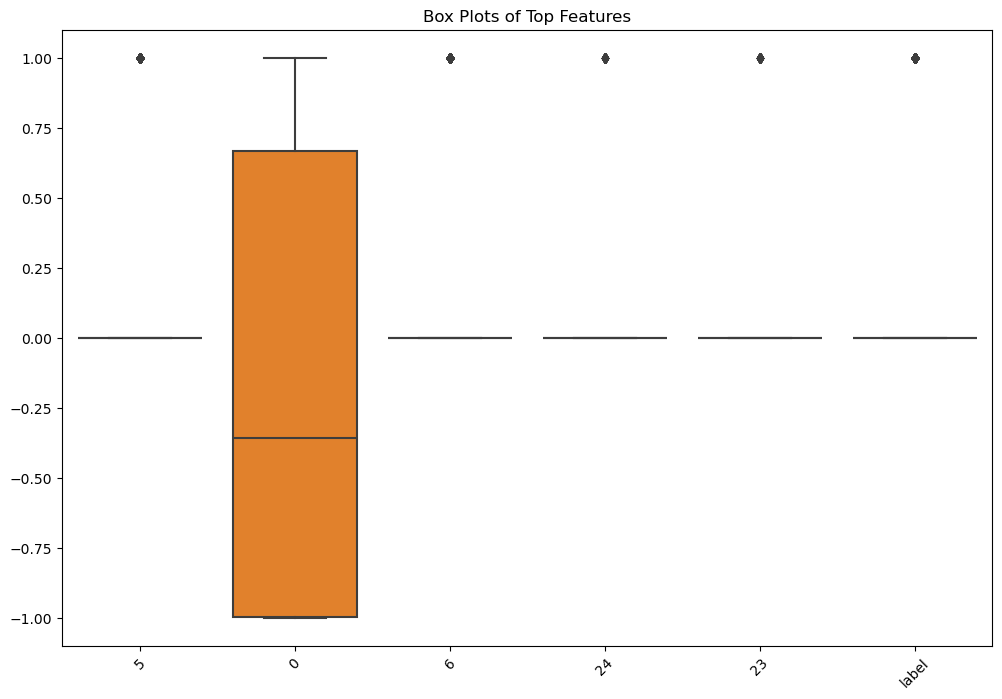

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=selected_df)
plt.title('Box Plots of Top Features')
plt.xticks(rotation=45)
plt.show()

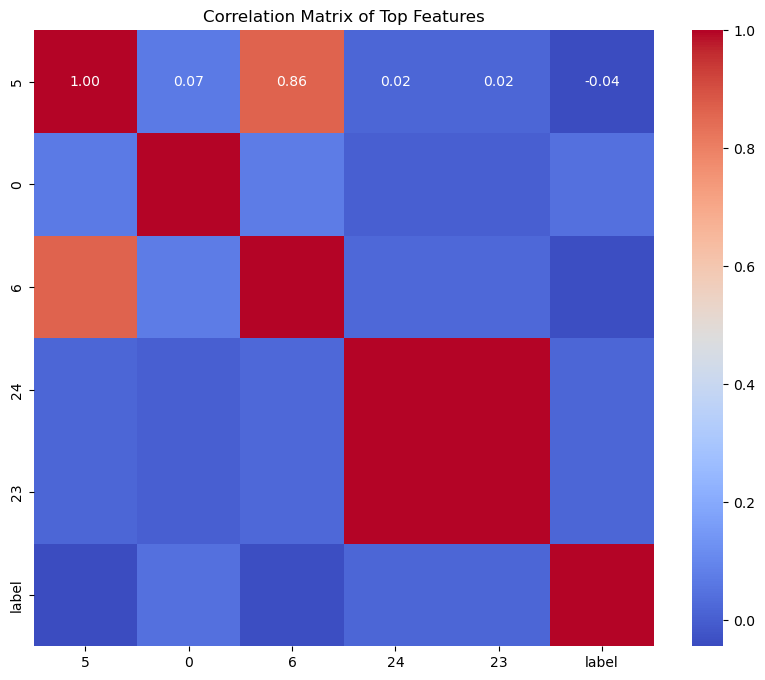

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(selected_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Top Features')
plt.show()

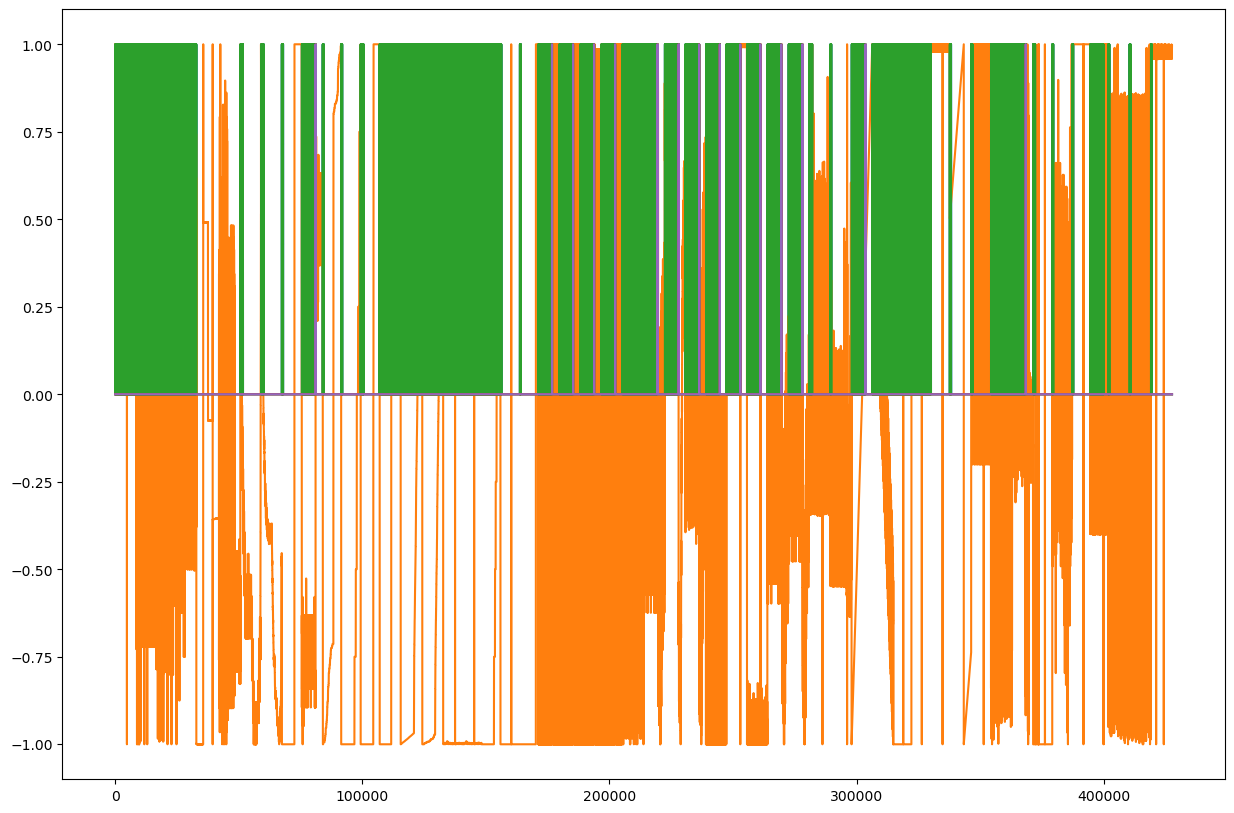

In [32]:
plt.figure(figsize=(15, 10))
for feature in top_features:
    plt.plot(smap_test.index, smap_test[feature], label=feature)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


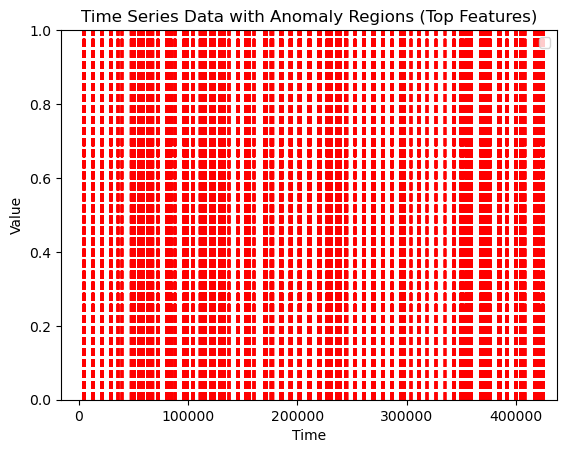

In [33]:
anomaly_indices = smap_test[smap_test['label'] == 1].index
for index in anomaly_indices:
    plt.axvline(x=index, color='r', linestyle='--', label='_Anomaly Regions')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Data with Anomaly Regions (Top Features)')
plt.legend(loc='upper right')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = smap_test.drop("label", axis="columns")
y = smap_test["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
model.predict(X_test[:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [36]:
y_test[:10]

136370    0
125931    0
274256    0
301655    0
409589    0
288910    0
332429    0
88363     0
107521    0
301170    0
Name: label, dtype: int64

In [37]:
model.score(X_test, y_test)

0.9337495907581498

## for msl_test.csv and msl_test_labels.csv

In [38]:
import pandas as pd

msl_test = pd.read_csv('files/msl_test.csv')
msl_test_labels = pd.read_csv('files/msl_test_label.csv')
msl_test.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-0.946958,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.942278,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.936037,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.923557,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.917317,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
msl_test_labels.head()

,0
0,0
1,0
2,0
3,0
4,0


In [40]:
msl_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
count,73729.000000,73729.0,73729.0,73729.0,73729.0,73729.000000,73729.000000,73729.000000,73729.0,73729.000000,...,73729.000000,73729.000000,73729.000000,73729.000000,73729.000000,73729.0,73729.000000,73729.0,73729.000000,73729.000000
mean,0.238579,0.0,0.0,0.0,0.0,0.077758,0.000543,0.000258,0.0,0.000095,...,0.000203,0.000014,0.010891,0.000136,0.008274,0.0,0.000041,0.0,0.001506,0.001723
std,6.626549,0.0,0.0,0.0,0.0,0.267792,0.023286,0.016051,0.0,0.009743,...,0.014262,0.003683,0.103792,0.011645,0.090583,0.0,0.006379,0.0,0.038772,0.041468
min,-1.424197,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,-0.986429,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,-0.310727,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
75%,0.918899,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
max,258.108108,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000


In [41]:
msl_test["label"] = msl_test_labels

In [42]:
corr_matrix = msl_test.corr()
correlations_with_label = corr_matrix['label'].abs().sort_values(ascending=False)

In [43]:
correlations_with_label

label    1.000000
0        0.143276
33       0.040073
14       0.039948
13       0.037917
15       0.028094
37       0.024748
5        0.021636
23       0.021467
11       0.020933
16       0.020860
39       0.015390
41       0.014845
35       0.013997
19       0.013514
17       0.011664
9        0.010260
12       0.009713
47       0.008761
27       0.008408
45       0.007497
31       0.005544
53       0.005347
6        0.004199
48       0.003592
43       0.003296
7        0.002749
20       0.002416
25       0.002189
51       0.002189
28       0.001787
46       0.001264
29       0.001229
49       0.000852
54       0.000402
1             NaN
2             NaN
3             NaN
4             NaN
8             NaN
10            NaN
18            NaN
21            NaN
22            NaN
24            NaN
26            NaN
30            NaN
32            NaN
34            NaN
36            NaN
38            NaN
40            NaN
42            NaN
44            NaN
50            NaN
52        

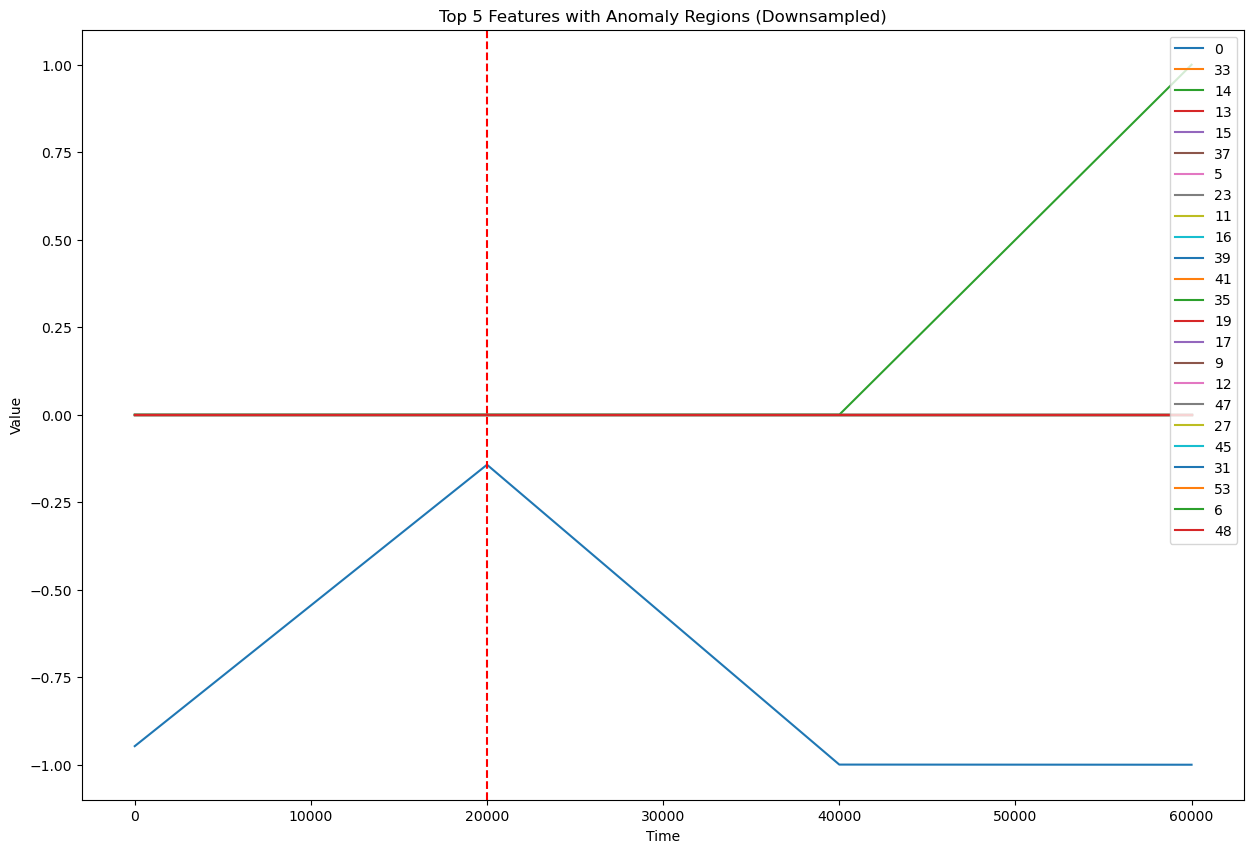

In [44]:
# I will first complete the task of finding the correlation matrix to reduce the features and ensure that the plot is clearly visible.
import matplotlib.pyplot as plt

# Downsample data
downsampled_test_data = msl_test.iloc[::20000]
downsampled_label_data = msl_test_labels.iloc[::20000]

top_features = correlations_with_label.index[1:25]

# Plot time series data for the top 5 features
plt.figure(figsize=(15, 10))
for feature in top_features:
    plt.plot(downsampled_test_data.index, downsampled_test_data[feature], label=feature)

# Overlay anomaly regions
anomaly_indices = downsampled_label_data[downsampled_label_data.values == 1].index
for index in anomaly_indices:
    plt.axvline(x=index, color='r', linestyle='--', label='_Anomaly Regions')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Top 5 Features with Anomaly Regions (Downsampled)')
plt.legend(loc='upper right')
plt.show()

In [45]:
import numpy as np
import seaborn as sns

msl_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,label
count,73729.000000,73729.0,73729.0,73729.0,73729.0,73729.000000,73729.000000,73729.000000,73729.0,73729.000000,...,73729.000000,73729.000000,73729.000000,73729.000000,73729.0,73729.000000,73729.0,73729.000000,73729.000000,73729.000000
mean,0.238579,0.0,0.0,0.0,0.0,0.077758,0.000543,0.000258,0.0,0.000095,...,0.000014,0.010891,0.000136,0.008274,0.0,0.000041,0.0,0.001506,0.001723,0.105332
std,6.626549,0.0,0.0,0.0,0.0,0.267792,0.023286,0.016051,0.0,0.009743,...,0.003683,0.103792,0.011645,0.090583,0.0,0.006379,0.0,0.038772,0.041468,0.306982
min,-1.424197,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,-0.986429,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,-0.310727,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.918899,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
max,258.108108,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000


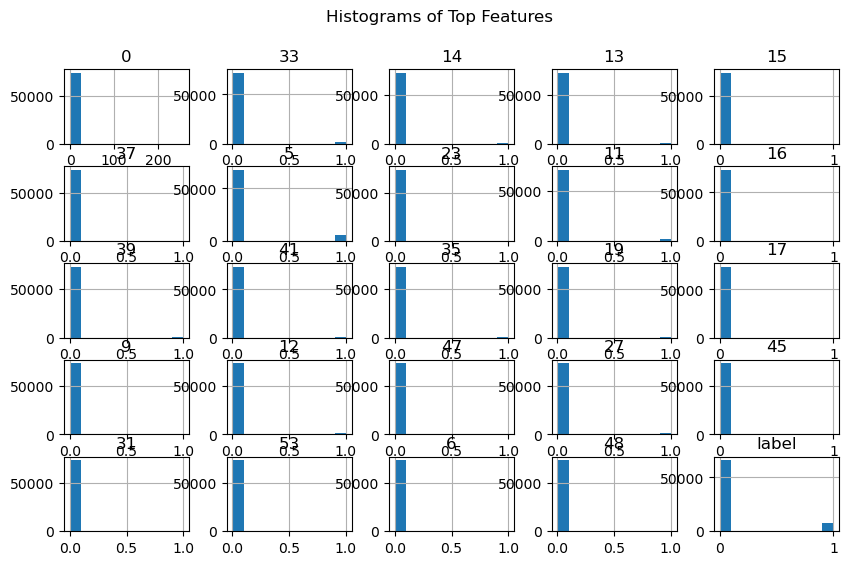

In [46]:
selected_features = top_features.tolist() + ['label']
selected_df = msl_test[selected_features]
selected_df.hist(figsize=(10, 6))
plt.suptitle('Histograms of Top Features')
plt.show()

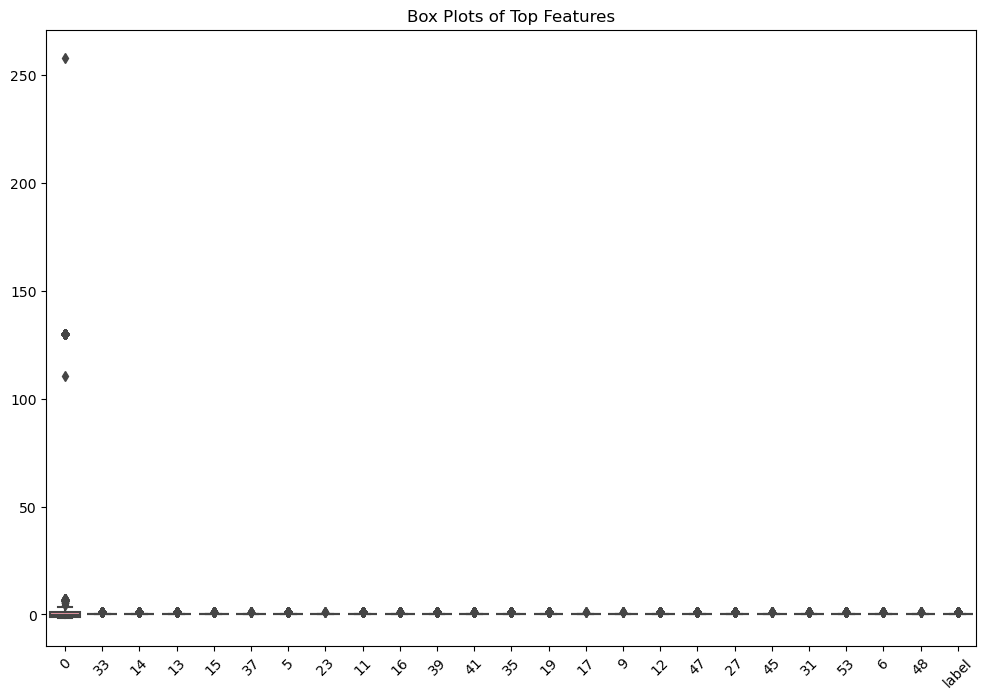

In [47]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=selected_df)
plt.title('Box Plots of Top Features')
plt.xticks(rotation=45)
plt.show()

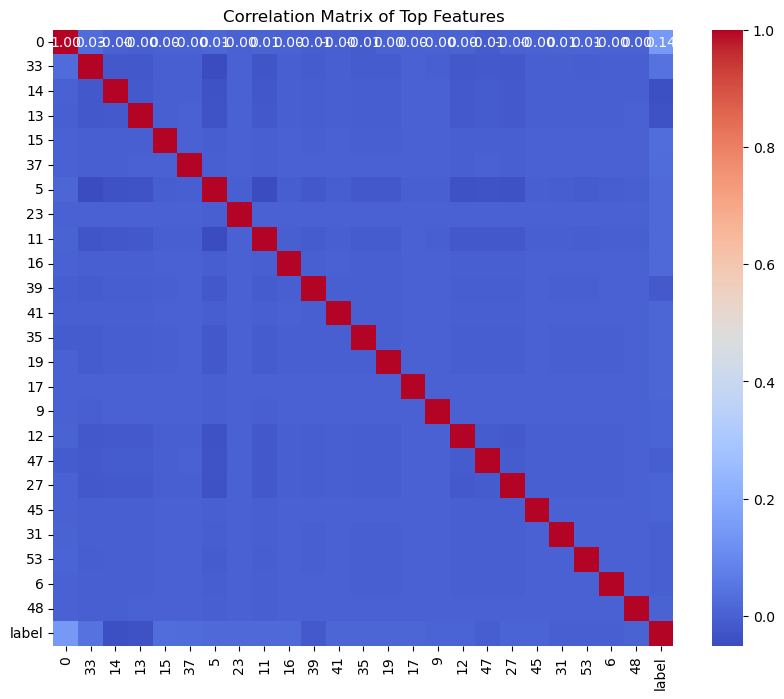

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(selected_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Top Features')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


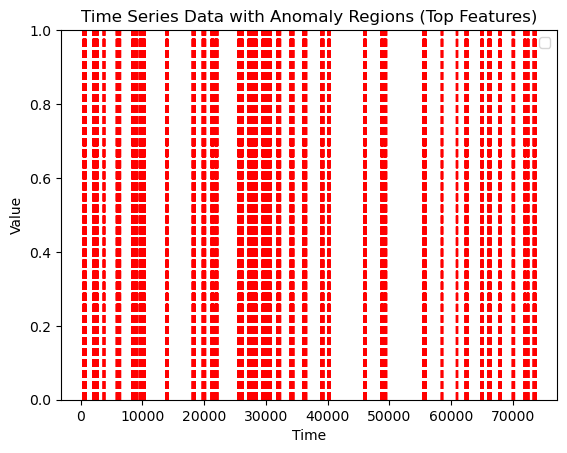

In [49]:
anomaly_indices = msl_test[msl_test['label'] == 1].index
for index in anomaly_indices:
    plt.axvline(x=index, color='r', linestyle='--', label='_Anomaly Regions')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Data with Anomaly Regions (Top Features)')
plt.legend(loc='upper right')
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = msl_test.drop("label", axis="columns")
y = msl_test["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
model.score(X_test, y_test)

0.8959717889597179

In [52]:
model.predict(X_test[:10])

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [53]:
y_test[:10]

47264    0
29779    1
7842     0
72903    0
9731     1
61132    0
11619    0
54006    0
28659    0
67997    0
Name: label, dtype: int64

## For psm_test.csv and psm_test_labels.csv

In [54]:
import pandas as pd

psm_test = pd.read_csv('files/psm_test.csv')
psm_test_label = pd.read_csv('files/psm_test_label.csv')
psm_test.head()

,timestamp_(min),feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24
0,132480.0,0.775374,0.909185,0.606704,0.660626,0.449968,0.426717,0.471591,0.434668,0.479511,...,0.400617,0.480444,0.588670,0.404036,0.638957,0.020236,0.042705,0.173375,0.008715,0.105991
1,132481.0,0.775423,0.909142,0.607796,0.660655,0.487813,0.442545,0.505682,0.448640,0.499451,...,0.396902,0.500213,0.587041,0.421605,0.637865,0.018550,0.042705,0.191826,0.010893,0.110599
2,132482.0,0.775458,0.909004,0.607988,0.660623,0.469532,0.433682,0.477273,0.450906,0.487223,...,0.389270,0.487982,0.582404,0.407393,0.636091,0.018550,0.039146,0.188361,0.010893,0.115207
3,132483.0,0.775513,0.909200,0.607218,0.660640,0.459910,0.435581,0.482955,0.454683,0.490431,...,0.403780,0.491253,0.584660,0.407141,0.638138,0.020236,0.042705,0.186975,0.013072,0.110599
4,132484.0,0.775587,0.909318,0.606654,0.660643,0.462155,0.436214,0.477273,0.449396,0.494671,...,0.403636,0.495947,0.581527,0.402761,0.632678,0.021922,0.042705,0.156325,0.008715,0.110599


In [55]:
psm_test_label.head()

,timestamp_(min),label
0,132480.0,0
1,132481.0,0
2,132482.0,0
3,132483.0,0
4,132484.0,0


In [56]:
merged_data = pd.merge(psm_test, psm_test_label, on='timestamp_(min)')

In [57]:
merged_data.head()

,timestamp_(min),feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,label
0,132480.0,0.775374,0.909185,0.606704,0.660626,0.449968,0.426717,0.471591,0.434668,0.479511,...,0.480444,0.588670,0.404036,0.638957,0.020236,0.042705,0.173375,0.008715,0.105991,0
1,132481.0,0.775423,0.909142,0.607796,0.660655,0.487813,0.442545,0.505682,0.448640,0.499451,...,0.500213,0.587041,0.421605,0.637865,0.018550,0.042705,0.191826,0.010893,0.110599,0
2,132482.0,0.775458,0.909004,0.607988,0.660623,0.469532,0.433682,0.477273,0.450906,0.487223,...,0.487982,0.582404,0.407393,0.636091,0.018550,0.039146,0.188361,0.010893,0.115207,0
3,132483.0,0.775513,0.909200,0.607218,0.660640,0.459910,0.435581,0.482955,0.454683,0.490431,...,0.491253,0.584660,0.407141,0.638138,0.020236,0.042705,0.186975,0.013072,0.110599,0
4,132484.0,0.775587,0.909318,0.606654,0.660643,0.462155,0.436214,0.477273,0.449396,0.494671,...,0.495947,0.581527,0.402761,0.632678,0.021922,0.042705,0.156325,0.008715,0.110599,0


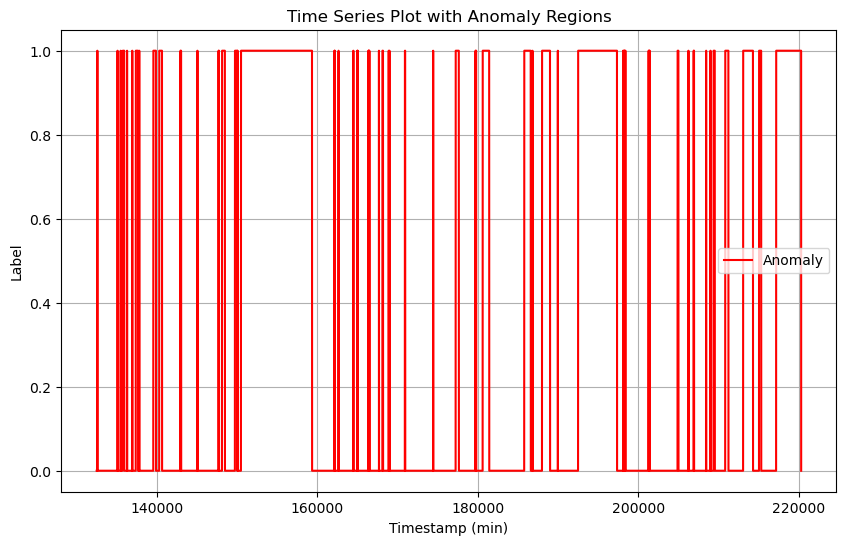

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(merged_data['timestamp_(min)'], merged_data['label'], label='Anomaly', color='red')
plt.xlabel('Timestamp (min)')
plt.ylabel('Label')
plt.title('Time Series Plot with Anomaly Regions')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
# Summary statistics
print("Summary Statistics:")
merged_data.describe()

Summary Statistics:


,timestamp_(min),feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,label
count,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,...,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000
mean,176400.000000,0.829105,0.857500,0.622801,0.652205,0.516833,0.482637,0.539184,0.520756,0.528672,...,0.530528,0.611334,0.426030,0.640173,0.010739,0.014477,0.209236,0.013991,0.174961,0.277558
std,25357.656835,0.047640,0.073858,0.031606,0.171261,0.077901,0.069440,0.054200,0.069604,0.072979,...,0.071854,0.043456,0.049188,0.043308,0.010034,0.017572,0.033675,0.006031,0.057975,0.447797
min,132480.000000,0.521701,0.387415,0.453511,0.331163,0.073765,0.117442,0.193182,0.080438,0.036741,...,0.077798,0.393533,0.117788,0.424242,0.000000,0.000000,0.132879,0.000000,0.023041,0.000000
25%,154440.000000,0.795859,0.809958,0.604902,0.548472,0.463117,0.433682,0.502273,0.474320,0.481604,...,0.483288,0.581527,0.394623,0.615479,0.005059,0.000000,0.183885,0.010893,0.133641,0.000000
50%,176400.000000,0.825835,0.867525,0.616689,0.585220,0.519564,0.480848,0.534091,0.519637,0.531086,...,0.533210,0.605214,0.422243,0.640186,0.010118,0.007117,0.205642,0.013072,0.170507,0.000000
75%,198360.000000,0.861815,0.914453,0.636475,0.671173,0.573124,0.529915,0.568182,0.567221,0.575146,...,0.576874,0.640682,0.453484,0.661070,0.015177,0.024911,0.230517,0.015251,0.211982,1.000000
max,220320.000000,0.928893,1.000000,0.720898,1.000000,1.000000,1.000000,0.880682,1.000000,1.000000,...,1.000000,1.000000,0.761031,0.895987,0.994941,1.000000,0.554052,0.091503,0.990783,1.000000


In [60]:
# Data types and missing values
print("\nData Types and Missing Values:")
merged_data.info()


Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87841 entries, 0 to 87840
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp_(min)  87841 non-null  float64
 1   feature_0        87841 non-null  float64
 2   feature_1        87841 non-null  float64
 3   feature_2        87841 non-null  float64
 4   feature_3        87841 non-null  float64
 5   feature_4        87841 non-null  float64
 6   feature_5        87841 non-null  float64
 7   feature_6        87841 non-null  float64
 8   feature_7        87841 non-null  float64
 9   feature_8        87841 non-null  float64
 10  feature_9        87841 non-null  float64
 11  feature_10       87841 non-null  float64
 12  feature_11       87841 non-null  float64
 13  feature_12       87841 non-null  float64
 14  feature_13       87841 non-null  float64
 15  feature_14       87841 non-null  float64
 16  feature_15       87841 non

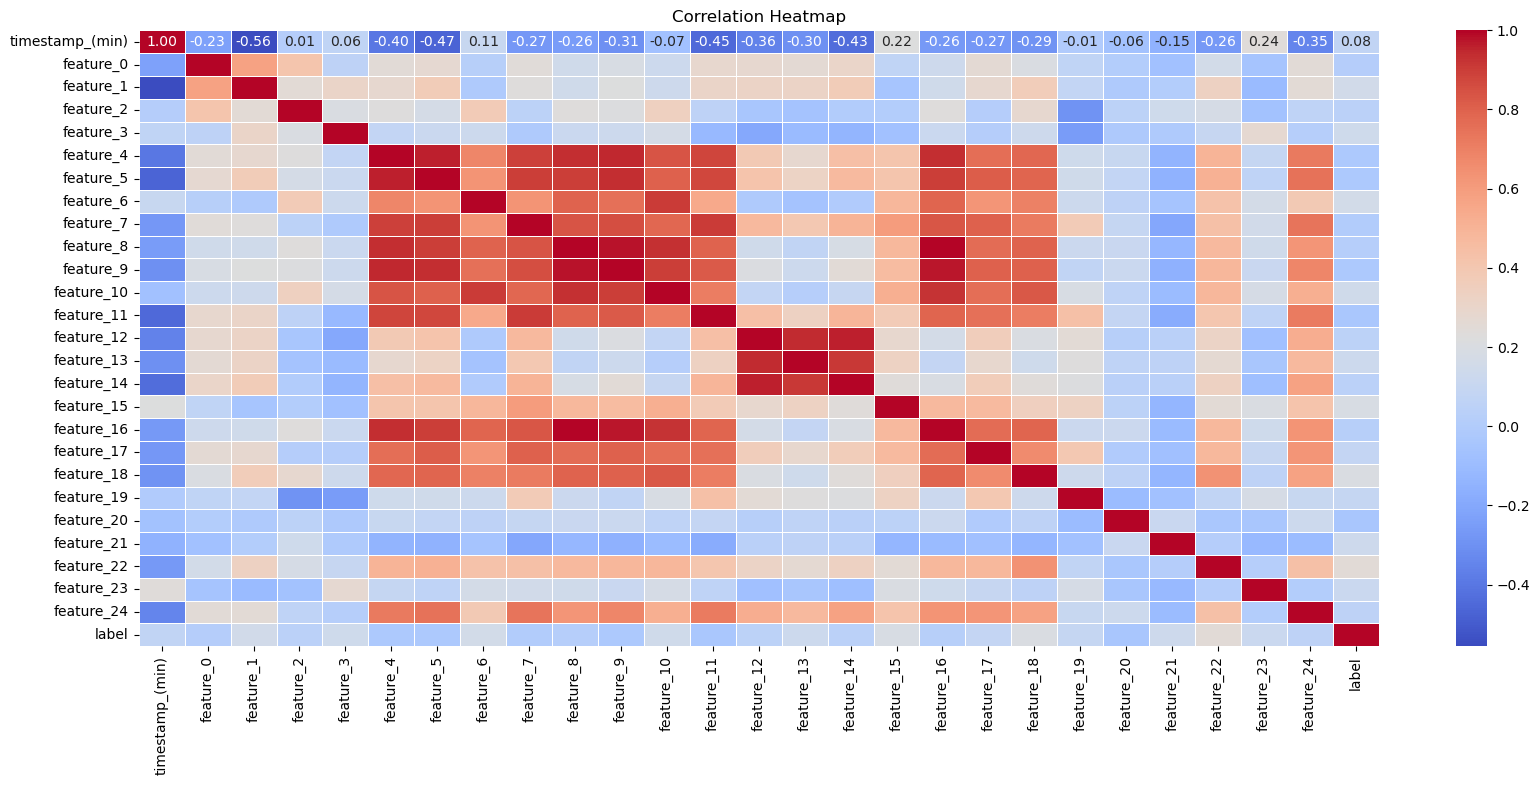

In [61]:
# Correlation heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = merged_data.drop("label", axis="columns")
y = merged_data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
model.score(X_test, y_test)

0.9970971597700495

In [64]:
model.predict(X_test[:10])

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [65]:
y_test[:10]

2844     0
70244    0
42196    0
7515     0
85645    1
44792    1
63995    1
3050     0
15478    0
73466    0
Name: label, dtype: int64